# Wrangle and Analyze Data Project 
#### by Ahmed Al Shehri 



<ul>
<li><a href="#Intro"> Introduction </a></li>
<li><a href="#Gath"> Gathering Data </a>
    <ul>
        <li><a href="#T1">1st  source :  Twitter Archive </a></li>
        <li><a href="#T2">2nd  Source :  The tweet image predictions</a></li>
        <li><a href="#T3">3rd  Source :  Twitter API </a></li>
    </ul>
<li><a href="#Asse">Assessing Data</a>
    <ul>
        <li><a href="#T21"> Visual Assessment </a></li>
        <li><a href="#T22"> Programmatic Assessment</a></li>
        <li><a href="#T23"> Assessing Summary </a></li>
    </ul>
<li><a href="#Clean">Cleaning data</a></li>
<li><a href="#analysis">Storing, Analyzing, and Visualizing</a></li>
<li><a href="#limitation">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='Intro'></a>
## Introduction

In this project I am tryiing to wrangle WeRateDogs Twitter data, passing by the processes of data wrangling and then create a clear visualization , Using Python and its libraries, I gathered data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. The dataset that I am  wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon. I wrote some reports as required in this project but it is not in this juypter nootbook.

##### <font color=blue> My tasks in this project are as follows : </font>
- <font color=pink,black>Gathering data</font>
- <font color=pink,black> Assessing data</font>
- <font color=pink,black> Cleaning data</font>
- <font color=pink,black> Analyzing, and Visualizing your wrangled data</font>
-  <font color=pink,black>Reporting on 1) your data wrangling efforts    and      2) your data analyses and visualizations</font>




In [361]:
#Importing Libraries

from PIL import Image
from io import BytesIO
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
import time
from timeit import default_timer as timer
import requests
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


---

<a id='Gath'></a>
## <font color=blue|green> Gathering data :</font>


<a id='T1'></a>
### <font color=red|yellow|black>1st source : Twitter Archive</font>



In [360]:
#Twitter Archive Enhanced "TAE"
TAE = pd.read_csv('twitter-archive-enhanced.csv')
TAE.head()

FileNotFoundError: [Errno 2] File b'twitter-archive-enhanced.csv' does not exist: b'twitter-archive-enhanced.csv'

---

<a id='T2'></a>
### <font color=red|yellow|black>2nd  Source : The tweet image predictions</font>




The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [155]:
#The Tweet Image Predictions "TIP"


TIP_URL='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(TIP_URL)



with open('image-predictions.tsv', mode ='wb') as file:
    file.write(r.content)

#Read TSV file
TIP = pd.read_csv('image-predictions.tsv', sep='\t' )
TIP.head()



,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


---

<a id='T3'></a>
### <font color=red|yellow|black> 3rd Source : Twitter API </font>





Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, I query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data  written to its own line. Then I read this .txt file line by line into a pandas DataFrame .


 <font color=green>I requested twitter to set up my own Twitter applicationso so  I access the Twitter API in order to complete a Data Wrangling  project using Tweepy to query Twitter's AP for data included in the WeRateDogs Twitter archive.<font color=green>I recieved a Success message that proved my new Twitter developer account , and then I used  the Keys I need it in the following codes.</font>

---




In [14]:
API_KEY = 'lSRd2avaVDMduKQ0asba3UzWo'
API_SECRET_KEY = 'BEhQZjavduIMbZN7fro2sWgrrEEuBE3IBoB5Y7Q5WSWPw76RQS'
ACCESS_TOKEN = '758063113862258693-fi4vm9cPeCQHxqHpLgFGv4oVD2lYtr0'
ACCESS_TOKEN_SECRET = 'ABxbAZZ3uDg1JGR4HzMzRMD7xhQAckboTUfZ1ea10qnzd'

auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)
    

In [16]:
#1Each tweet's JSON data should be written to its own line. 
#2 read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.
#To measure the elapsed wall-clock time between two points, I used time.time()

gathering = []
error = []


start = time.time()
for tweet_id in TAE['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit = True,
                               wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # tweet's favorites
        retweets = tweet['retweet_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] # user's favorites
        date_time = tweet['created_at'] # The date and time of the creation
        
        gathering.append({'tweet_id': int(tweet_id), 'favorites': int(favorites), 'retweets': int(retweets),
                        'user_followers': int(user_followers), 'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception as e:
        print(str(tweet_id)+ " __ " + str(e))     #جرب تحذف ذي
        error.append(tweet_id)

# Calculate the time of excution
end = time.time()
print(end - start)

#[Resources](https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python)


888202515573088257 __ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 __ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 __ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 __ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 __ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 __ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 __ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 __ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 __ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 __ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 __ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 __ [{'code': 144, 'message': 'No status found with that ID.'}]
8373662848745717

Rate limit reached. Sleeping for: 406


754011816964026368 __ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 __ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 405


2116.263113975525


In [134]:
JST = pd.DataFrame(gathering, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
JST.to_csv('JST.txt', encoding = 'utf-8', index=False)

In [135]:
# Read the saved tweet_json.txt file into a dataframe
TAP = pd.read_csv('tweet_json.txt', encoding = 'utf-8')     #ايش معنى utf-8
TAP

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36931,7870,8508498,143654,2017-08-01 16:23:56+00:00
1,892177421306343426,31776,5844,8508498,143654,2017-08-01 00:17:27+00:00
2,891815181378084864,23945,3855,8508498,143654,2017-07-31 00:18:03+00:00
3,891689557279858688,40258,8040,8508498,143654,2017-07-30 15:58:51+00:00
4,891327558926688256,38455,8701,8508498,143654,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2328,666049248165822465,99,41,8508590,143653,2015-11-16 00:24:50+00:00
2329,666044226329800704,279,134,8508590,143653,2015-11-16 00:04:52+00:00
2330,666033412701032449,118,43,8508590,143653,2015-11-15 23:21:54+00:00
2331,666029285002620928,122,44,8508587,143653,2015-11-15 23:05:30+00:00


---

<a id='Asse'></a>
## <font color=blue|green> Assessing Data :</font>


<a id='T21'></a>

### <font color=blue|red|green|pink>Visual Assessment</font>



In [30]:
TAE.sample(8)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1295,707983188426153984,7.079801e+17,2.319108e+09,2016-03-10 17:35:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@serial @MrRoles OH MY GOD I listened to all o...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
916,756998049151549440,NaN,NaN,2016-07-23 23:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's an English Creamschnitzel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756998049...,11,10,Oliver,None,None,None,None
1422,698178924120031232,NaN,NaN,2016-02-12 16:16:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lily. She accidentally dropped all her...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698178924...,10,10,Lily,None,None,None,None
1550,689154315265683456,NaN,NaN,2016-01-18 18:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate birds but I feel bad co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689154315...,9,10,None,None,None,None,None
1972,673240798075449344,NaN,NaN,2015-12-05 20:41:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Magical floating dog here. Very calm. Always h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673240798...,6,10,None,None,None,None,None
67,879376492567855104,NaN,NaN,2017-06-26 16:31:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jack AKA Stephen Furry. You're not sco...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879376492...,12,10,Jack,None,None,None,None
606,798340744599797760,NaN,NaN,2016-11-15 01:44:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Davey. He'll have your ...,7.717705e+17,4.196984e+09,2016-09-02 18:03:10 +0000,https://twitter.com/dog_rates/status/771770456...,11,10,Davey,None,None,None,None
620,796125600683540480,NaN,NaN,2016-11-08 23:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,NaN,NaN,NaN,https://twitter.com/king5seattle/status/796123...,13,10,None,None,None,None,None


In [31]:
TIP.sample(8)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
500,675845657354215424,https://pbs.twimg.com/media/CWEWClfW4AAnqhG.jpg,1,pug,0.883952,True,Boston_bull,0.011057,True,French_bulldog,0.009840,True
718,685667379192414208,https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg,1,sliding_door,0.344526,False,doormat,0.190027,False,washbasin,0.046326,False
372,672984142909456390,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,1,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False
157,668852170888998912,https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg,1,golden_retriever,0.903529,True,Tibetan_mastiff,0.041497,True,kuvasz,0.022500,True
99,667773195014021121,https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg,1,West_Highland_white_terrier,0.360465,True,pug,0.093494,True,ice_bear,0.069038,False
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/86128...,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True
1578,796149749086875649,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False
1331,757611664640446465,https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg,1,bluetick,0.829259,True,beagle,0.145358,True,Walker_hound,0.019595,True


In [32]:
TAP.sample(8)


,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
1892,674318007229923329,1400,513,8508572,143653,2015-12-08 20:01:55+00:00
423,819952236453363712,5509,1230,8508510,143654,2017-01-13 17:00:21+00:00
512,808344865868283904,44288,21810,8508510,143654,2016-12-12 16:16:49+00:00
1652,682259524040966145,4231,1230,8508552,143655,2015-12-30 17:58:40+00:00
1726,679047485189439488,2272,677,8508553,143655,2015-12-21 21:15:11+00:00
2265,667176164155375616,594,446,8508586,143653,2015-11-19 03:02:47+00:00
923,752660715232722944,4509,1603,8508537,143654,2016-07-12 00:27:52+00:00
1933,673612854080196609,1585,717,8508572,143653,2015-12-06 21:19:54+00:00


---

<a id='T22'></a>

### <font color=blue|red|green|pink>Programmatic Assessment</font>


In [33]:
TAE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [34]:
TAE.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [35]:
TAE.isnull().sum() 

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [36]:
sum(TAE['tweet_id'].duplicated())


0

In [37]:
TAE.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [38]:
TAE.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [39]:
#CHECK For retweet in the dataset (T1)
len(TAE[TAE.retweeted_status_id.isnull() == False])

181

In [40]:
TAE[TAE['retweeted_status_id'].isnull()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [41]:
# TO see how many  cells of `text` with doggo, puppo, floofer, and pupper
for column in TAE.columns[-4:]:
    print(column, TAE.text.str.contains(column).sum())

doggo 98
floofer 4
pupper 272
puppo 37


In [42]:
TAE.name.value_counts()


None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Jed          1
Cheryl       1
Pepper       1
Willie       1
Rhino        1
Name: name, Length: 957, dtype: int64

In [43]:
TIP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
TIP.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [45]:
TIP.isnull().sum() 

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [46]:
sum(TIP.jpg_url.duplicated())


66

In [47]:
print(TIP.p1_dog.value_counts())
print(TIP.p2_dog.value_counts())
print(TIP.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [48]:
TIP.img_num.value_counts()


1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [50]:
TAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 6 columns):
tweet_id           2333 non-null int64
favorites          2333 non-null int64
retweets           2333 non-null int64
user_followers     2333 non-null int64
user_favourites    2333 non-null int64
date_time          2333 non-null object
dtypes: int64(5), object(1)
memory usage: 109.5+ KB


In [51]:
TAP.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.333000e+03,2333.000000,2333.000000,2.333000e+03,2333.000000
mean,7.419279e+17,7704.276897,2772.797257,8.508547e+06,143653.842263
std,6.820607e+16,11958.338165,4693.536820,7.647023e+01,0.545507
min,6.660209e+17,0.000000,1.000000,8.508498e+06,143653.000000
25%,6.782786e+17,1337.000000,558.000000,8.508512e+06,143654.000000
50%,7.184547e+17,3353.000000,1299.000000,8.508541e+06,143654.000000
75%,7.986654e+17,9461.000000,3224.000000,8.508554e+06,143654.000000
max,8.924206e+17,159610.000000,79662.000000,8.509233e+06,143656.000000


In [52]:
TAP.isnull().sum() 

tweet_id           0
favorites          0
retweets           0
user_followers     0
user_favourites    0
date_time          0
dtype: int64

---

<a id='T23'></a>
### <font color=blue|red|green|pink>Assessing Summary </font>


###### •	You only want original ratings (no retweets) that have images ,Though there are 5000+ tweets in the dataset, not all are dog ratings and Some are retweets.

###### • The requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.


### <font color=blue|red> Quality </font>

#### <font color=pink> A) Twitter Archieved (TAE) </font>

1.	 Remove retweet and replies datasets 
2.	Change the variables datatypes :
 - tweet_id	  ________________________  strings instead of integer                    
 - in_reply_to_status_id ________________________  		strings instead of float.
 - in_reply_to_user_id  _________________ 	strings instead of float.
 - retweeted_status_id	 _______________ 	 strings instead of float.
 - retweeted_status_user_id ____________ 		strings instead of float.
 - retweeted_status_timestamp  ___________ 		datetime instead of object (string).
3.	Keep 'name' column with values that start with capital words 
4.  Change any values that 'Null' to 'None'
5.  Delete the link from the text coloumn 



#### <font color=pink> B) The tweet image predictions (TIP) </font>

1. drop the jpg_url that are duplicate.
 - tweet_id, 				strings instead of integer
2. change underscore to space in p1,p2 and p3
3. make all the values in p1,p2,p3 is starting with capital letter
4. Rename coloumns
5. Change any values that 'Nan' to 'None'
4. The names for the heading columns isn't clear , I will change 
 - p1               to  "First prediction"
 - p2               to  "Second prediction"
 - p3               to  "Third prediction"
 - p1_conf          to  "First confidence prediction" 
 - p2_conf          to  "Second confidence prediction"
 - p3_conf          to  "Third confidence prediction"          
5. Change any values that 'Nan' to 'None'    



#### <font color=pink> C) Twitter API (TAP) </font>
1.	Change the variables datatypes in Twitter API data  
 - Tweet_id ________________________ strings instead of integer
 - Date_time ________________________ datetime instead of object (string).
 
   
### <font color=blue|red> Tidiness</font>

1. Merge Dog types in one column insted of four columns (doggo, floofer, pupper, puppo), no need for that .
2. Merge TAE,TIP which is first and second dataframes(Twitter Archieved + tweet image predictions)to be T12 based on ID.
3. Combine the datasets together T12 and TAP ( Twitter Archieved + The tweet image predictions + Twitter API) based on ID.
 

    




---

<a id='Clean'></a>
## <font color=blue|green> Cleaning Data :</font>



In [156]:
#First step in cleaning is to take a copy of the original data 
T1=TAE.copy()   #Twitter Archieved
T2=TIP.copy()   #The tweet image predictions
T3=TAP.copy()   #Twitter API 



---

We only want the original tweets (No Retweets and Replies) .when the "retweeted_status_id" is not 'Nan' will be removed from the data set .
Then all the coloumns related to 'rwtweeted will be removed "retweeted_status_id','retweeted_status_user_id' and 'retweeted_status_timestamp".
##### Define
#### <font color=blue|yellow> Quality issue </font>
Define Remove retweet and replies datasets in Twitter archieved data.


##### Code

In [157]:
#so As we can see from, the "info()" function or from the following code , 181 values that's not null in the retweeted status and we need to remove them.

retweets = (~T1.retweeted_status_user_id.isnull())
retweets.sum()

181

In [158]:
T1.drop(T1[T1['retweeted_status_id'].notnull()==True].index,inplace=True)

In [159]:
retweets = (~T1.retweeted_status_user_id.isnull())
retweets.sum()

0

In [160]:
#check before Remove replies datasets.

replies = (~T1.in_reply_to_status_id.isnull())
replies.sum()

78

In [161]:
T1.drop(T1[T1['in_reply_to_status_id'].notnull()==True].index,inplace=True)

In [162]:
#check after Remove replies datasets.

replies = (~T1.in_reply_to_status_id.isnull())
replies.sum()

0

In [163]:
#so now the coloumns related to retweeted and replies are empty so we can drop it becuase it will not be used in the analysis becuase it is not original tweet
T1.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id'], axis= 1 , inplace= True)



#### Test

In [164]:
T1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


---


    
##### Define
#### <font color=blue|yellow> Quality issue </font>
Change the variables datatypes to what written following in Twitter archieved . 
 - tweet_id  ________________________  strings instead of integer                    
 - retweeted_status_timestamp  _________ datetime instead of object (string).

#### Code

In [166]:
T1['tweet_id'] = T1['tweet_id'].astype(str)
T1['timestamp'] = pd.to_datetime(T1['timestamp'])


##### Test

In [167]:
T1.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1686,681610798867845120,2015-12-28 23:00:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",*collapses* 12/10 https://t.co/C7M8mnzHIK,https://twitter.com/dog_rates/status/681610798...,12,10,None,None,None,None,None
419,822244816520155136,2017-01-20 00:50:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send pics of m...,https://twitter.com/dog_rates/status/822244816...,11,10,None,None,None,None,None
2024,671891728106971137,2015-12-02 03:20:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mojo. Apparently he's too cute for a s...,https://twitter.com/dog_rates/status/671891728...,11,10,Mojo,None,None,None,None
782,775364825476165632,2016-09-12 16:05:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Finley. He's an independent doggo stil...,https://twitter.com/dog_rates/status/775364825...,11,10,Finley,doggo,None,None,None
1064,740995100998766593,2016-06-09 19:52:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a vape god. Blows o's for da...,https://twitter.com/dog_rates/status/740995100...,10,10,Leo,None,None,None,None


In [168]:
T1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 213.0+ KB


---

####  Define 
#### <font color=blue|yellow> Tidiness issue </font>
 Merge Dog types in one column insted of four columns (doggo, floofer, pupper, puppo) In Twitter archieved , no need for that 

In [169]:
print('\nDoggo value counts\n',T1.doggo.value_counts())
print('\nFloofer value counts\n',T1.floofer.value_counts())
print('\nPupper value counts\n',T1.pupper.value_counts())
print('\nPuppo value counts\n',T1.puppo.value_counts())



Doggo value counts
 None     2014
doggo      83
Name: doggo, dtype: int64

Floofer value counts
 None       2087
floofer      10
Name: floofer, dtype: int64

Pupper value counts
 None      1867
pupper     230
Name: pupper, dtype: int64

Puppo value counts
 None     2073
puppo      24
Name: puppo, dtype: int64


In [170]:
# create a coloumn "type" to merge the four coloumns together (doggo, floofer, pupper and puppo) 
T1['type'] = T1[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

# drop the doggo, floofer, pupper and puppo columns
T1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


#### Test

In [171]:
T1.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [172]:
T1.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
type                  2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 163.8+ KB


---

#### Define
#### <font color=blue|yellow> Quality issue </font>
Keep 'name' column with values that start with capital words in Twitter archieved , otherwise "Not" 

#### Code

In [173]:
print(T1['name'].tail(50))
print(T1['name'].head(50))

2306          None
2307          None
2308          Jeph
2309       Jockson
2310          None
2311             a
2312         Josep
2313         Lugan
2314             a
2315    Christoper
2316          None
2317       Jimothy
2318      Kreggory
2319         Scout
2320          None
2321          None
2322          None
2323          None
2324          None
2325        Walter
2326         quite
2327             a
2328          None
2329          None
2330          None
2331          None
2332          None
2333            an
2334             a
2335            an
2336          None
2337          None
2338          None
2339          None
2340          None
2341          None
2342          None
2343          None
2344          None
2345           the
2346           the
2347             a
2348             a
2349            an
2350             a
2351          None
2352             a
2353             a
2354             a
2355          None
Name: name, dtype: object
0       Phineas
1       

In [174]:
#Quality issue
#I realise from T1['name'] that some values are not correct for example (a,an,very,quite,by,the,such,actually) or basiclly no value ,
#so I think it is a problem with transfering the data from another source so we could do one thing 
#the value that not starting with capital letter replace it with 'NOT' and change also 'none' to 'NOT'

#Define/ Keep ['name'] that start with capital words , otherwise "Not"


T1['name'][T1['name'].str.match('[a-z]+')] = 'Not'
T1['name']=T1['name'].str.replace('None', 'Not')

C:\Users\t33h3\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


#### Test

In [175]:
print(T1['name'].head(50))

0       Phineas
1         Tilly
2        Archie
3         Darla
4      Franklin
5           Not
6           Jax
7           Not
8          Zoey
9        Cassie
10         Koda
11        Bruno
12          Not
13          Ted
14       Stuart
15       Oliver
16          Jim
17         Zeke
18      Ralphus
20       Gerald
21      Jeffrey
22          Not
23       Canela
24          Not
25          Not
26         Maya
27       Mingus
28        Derek
29       Roscoe
31      Waffles
33        Jimbo
34       Maisey
35          Not
37          Not
38         Earl
39         Lola
40        Kevin
41          Not
42          Not
43         Yogi
44         Noah
45        Bella
46    Grizzwald
47          Not
48        Rusty
49          Gus
50      Stanley
51         Alfy
52         Koko
53          Rey
Name: name, dtype: object


---

#### Define
#### <font color=blue|yellow> Quality issue  </font>
Change any values in Twitter archieved data that 'Null' to 'None'


#### Code

In [176]:
T1.loc[T1['rating_numerator'] == 'NaN', 'rating_numerator'] = 0
#We cann't make it to denumenetor because it can not be zero


#### Test

In [177]:
T1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


---

In the coloumn {text} , We have both the Text and a link so we need to delete the link and keep the text only  
##### Define
#### <font color=blue|yellow> Quality issue </font>
Delete the link from the text coloumn in Twitter archieved

#### Code

In [178]:
T1['text'][0]


"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [179]:
T1['text'] = T1['text'].str.replace('http\S+|://\S+', '', case=False)


[Resource](https://stackoverflow.com/questions/51994254/removing-url-from-a-column-in-pandas-dataframe)

##### Test

In [180]:
T1['text'][0]


"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 "

---

##### Define
#### <font color=blue|yellow> Quality issue </font>
In Image Predictions Data drop the jpg_url that are duplicate 



#### Code

In [181]:
#we will drop the URL that are duplicate in the T2
sum(T2.jpg_url.duplicated())

66

In [182]:
#so we will delete 66 row in T2
T2 = T2.drop_duplicates('jpg_url')



#### Test

In [183]:
sum(T2.jpg_url.duplicated())

0

---

##### Define
#### <font color=blue|yellow> Quality issue </font>
In Image Predictions Data change underscore to space  in p1,p2 and p3 

#### Code

In [184]:
#Define: change to space from underscore in p1,p2 and p3 .


T2['p1']=T2['p1'].str.replace('_', ' ')
T2['p2']=T2['p2'].str.replace('_', ' ')
T2['p3']=T2['p3'].str.replace('_', ' ')


[Resource](https://www.geeksforgeeks.org/python-string-replace/#:~:targetText=replace()%20is%20an%20inbuilt,is%20replaced%20with%20another%20substring.&targetText=Parameters%20%3A,would%20replace%20the%20old%20substring)


#### Test

In [185]:
T2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


---

##### Define
#### <font color=blue|yellow> Quality issue </font>
In Image Predictions Data make all the values in p1,p2,p3 is starting with capital letter because it is names 


#### Code

In [186]:
T2['p1'] = T2['p1'].str.capitalize() 
T2['p2'] = T2['p2'].str.capitalize() 
T2['p3'] = T2['p3'].str.capitalize() 

[Resource](https://www.geeksforgeeks.org/capitalize-first-letter-of-a-column-in-pandas-dataframe)

#### Test

In [187]:
T2.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


---

##### Define
#### <font color=blue|yellow> Quality issue </font>
Rename coloumns in Image Predictions Data because the names for the heading columns isn't clear 
 - p1               to  "First prediction"
 - p2               to  "Second prediction"
 - p3               to  "Third prediction"
 - p1_conf          to  "First confidence prediction" 
 - p2_conf          to  "Second confidence prediction"
 - p3_conf          to  "Third confidence prediction"          





#### Code

In [188]:
list(T2.columns.values)


['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [189]:
T2.rename(columns={'p1':'First Prediction','p2':'Second Prediction','p3':"Third Prediction" ,
                   "p1_conf":"First Confidence Prediction" , "p2_conf":"Second Confidence Prediction", 
                   "p3_conf":"Third Confidence Prediction" ,"p1_dog":"First Prediction is a Dog",
                   "p2_dog":"Second Prediction is a Dog","p3_dog":"Third Prediction is a Dog",
                   "jpg_url":"Image URL","img_num":"Image Number"}, inplace=True)


#### Test

In [190]:
list(T2.columns.values)

['tweet_id',
 'Image URL',
 'Image Number',
 'First Prediction',
 'First Confidence Prediction',
 'First Prediction is a Dog',
 'Second Prediction',
 'Second Confidence Prediction',
 'Second Prediction is a Dog',
 'Third Prediction',
 'Third Confidence Prediction',
 'Third Prediction is a Dog']

---

##### Define
#### <font color=blue|yellow> Quality issue </font>
Change any values that 'Nan' to 'None' in Image Predictions Data.

#### Code

In [191]:
T2.loc[T2['First Prediction'] == 'NaN', 'First Prediction'] = None
T2.loc[T2['Second Prediction'] == 'NaN', 'Second Prediction'] = None
T2.loc[T2['Third Prediction'] == 'NaN', 'Third Prediction'] = None

#### Test

In [192]:
T2.head()

,tweet_id,Image URL,Image Number,First Prediction,First Confidence Prediction,First Prediction is a Dog,Second Prediction,Second Confidence Prediction,Second Prediction is a Dog,Third Prediction,Third Confidence Prediction,Third Prediction is a Dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


---

####  Define 
#### <font color=blue|yellow> Tidiness issue </font>
Merge TAE,TIP which is first and second dataframes(Twitter Archieved + tweet image predictions)to be T12 based on ID.

#### Code

In [193]:
#I will compare the tweet id in the both datasets and join the two table based on Id 
#first we need to make both of the datatypes for ( Tweet_id is string)
#We already changed tweet id for T1 from integer to string but we need to change it for T2 #تاكد انك سويت الثانية لوحرها قبلها
T2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                        2009 non-null int64
Image URL                       2009 non-null object
Image Number                    2009 non-null int64
First Prediction                2009 non-null object
First Confidence Prediction     2009 non-null float64
First Prediction is a Dog       2009 non-null bool
Second Prediction               2009 non-null object
Second Confidence Prediction    2009 non-null float64
Second Prediction is a Dog      2009 non-null bool
Third Prediction                2009 non-null object
Third Confidence Prediction     2009 non-null float64
Third Prediction is a Dog       2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [194]:
T2['tweet_id'] = T2['tweet_id'].astype(str)

T2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                        2009 non-null object
Image URL                       2009 non-null object
Image Number                    2009 non-null int64
First Prediction                2009 non-null object
First Confidence Prediction     2009 non-null float64
First Prediction is a Dog       2009 non-null bool
Second Prediction               2009 non-null object
Second Confidence Prediction    2009 non-null float64
Second Prediction is a Dog      2009 non-null bool
Third Prediction                2009 non-null object
Third Confidence Prediction     2009 non-null float64
Third Prediction is a Dog       2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [196]:
print(T1['tweet_id'].isin(T2['tweet_id']).value_counts())
print('\nso we have 281 tweet id thats unique in indivual coloumn and we want to drop them so we can join the two dataframe together')

True     1971
False     126
Name: tweet_id, dtype: int64

so we have 281 tweet id thats unique in indivual coloumn and we want to drop them so we can join the two dataframe together


In [197]:
T12 = pd.merge(T1,T2, on='tweet_id')
T12.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,Image URL,Image Number,First Prediction,First Confidence Prediction,First Prediction is a Dog,Second Prediction,Second Confidence Prediction,Second Prediction is a Dog,Third Prediction,Third Confidence Prediction,Third Prediction is a Dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True


#### Test

In [198]:
T12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 20 columns):
tweet_id                        1971 non-null object
timestamp                       1971 non-null datetime64[ns, UTC]
source                          1971 non-null object
text                            1971 non-null object
expanded_urls                   1971 non-null object
rating_numerator                1971 non-null int64
rating_denominator              1971 non-null int64
name                            1971 non-null object
type                            1971 non-null object
Image URL                       1971 non-null object
Image Number                    1971 non-null int64
First Prediction                1971 non-null object
First Confidence Prediction     1971 non-null float64
First Prediction is a Dog       1971 non-null bool
Second Prediction               1971 non-null object
Second Confidence Prediction    1971 non-null float64
Second Prediction is a Dog      197

---

####  Define 
#### <font color=blue|yellow> Quality issue </font>
Change the variables datatypes in Twitter API data . 

#### Code

In [199]:
T3['tweet_id'] =T3['tweet_id'].astype(str)
T3['date_time'] = pd.to_datetime(T3['date_time'])


#### Test

In [200]:
T3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 6 columns):
tweet_id           2333 non-null object
favorites          2333 non-null int64
retweets           2333 non-null int64
user_followers     2333 non-null int64
user_favourites    2333 non-null int64
date_time          2333 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 109.5+ KB


---

####  Define 
#### <font color=blue|yellow> Tidiness issue </font>
Combine the datasets together T12 and TAP ( Twitter Archieved + The tweet image predictions + Twitter API) based on ID.
 

#### Code

In [201]:
#Using merge to join columns
#We already merge Twitter API data + Twitter Archive data (T1+T2) together in one datasets T12
#Now we will merge T12 with tweet_data

T123 = pd.merge(T12,T3, on='tweet_id')


[Resources](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

#### Test

In [202]:
T123.head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,Image URL,...,Second Confidence Prediction,Second Prediction is a Dog,Third Prediction,Third Confidence Prediction,Third Prediction is a Dog,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.085851,False,Banana,0.076110,False,36931,7870,8508498,143654,2017-08-01 16:23:56+00:00
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.090647,True,Papillon,0.068957,True,31776,5844,8508498,143654,2017-08-01 00:17:27+00:00
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.078253,True,Kelpie,0.031379,True,23945,3855,8508498,143654,2017-07-31 00:18:03+00:00
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.168086,True,Spatula,0.040836,False,40258,8040,8508498,143654,2017-07-30 15:58:51+00:00
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.225770,True,German short-haired pointer,0.175219,True,38455,8701,8508498,143654,2017-07-29 16:00:24+00:00


---

<a id='analysis'></a>
## <font color=blue|green>Storing, Analyzing, and Visualizing  :</font>





#### <font color=blue|red|green|pink>Storing</font>

In [203]:
T123.to_csv('twitter_archive_master.csv', index=False)

---

#### <font color=blue|red|green|pink>Analyzing </font>

In [206]:
#I will take a copy of the original data to do analysis for the dataset
T1234=T123.copy()   #The Combine cleaning data

In [258]:
T1234.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,Image URL,...,Second Confidence Prediction,Second Prediction is a Dog,Third Prediction,Third Confidence Prediction,Third Prediction is a Dog,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.085851,False,Banana,0.076110,False,36931,7870,8508498,143654,2017-08-01 16:23:56+00:00
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.090647,True,Papillon,0.068957,True,31776,5844,8508498,143654,2017-08-01 00:17:27+00:00
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.078253,True,Kelpie,0.031379,True,23945,3855,8508498,143654,2017-07-31 00:18:03+00:00
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.168086,True,Spatula,0.040836,False,40258,8040,8508498,143654,2017-07-30 15:58:51+00:00
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.225770,True,German short-haired pointer,0.175219,True,38455,8701,8508498,143654,2017-07-29 16:00:24+00:00


In [257]:
T1234.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 25 columns):
tweet_id                        1964 non-null object
timestamp                       1964 non-null datetime64[ns, UTC]
source                          1964 non-null object
text                            1964 non-null object
expanded_urls                   1964 non-null object
rating_numerator                1964 non-null int64
rating_denominator              1964 non-null int64
name                            1964 non-null object
type                            1964 non-null object
Image URL                       1964 non-null object
Image Number                    1964 non-null int64
First Prediction                1964 non-null object
First Confidence Prediction     1964 non-null float64
First Prediction is a Dog       1964 non-null bool
Second Prediction               1964 non-null object
Second Confidence Prediction    1964 non-null float64
Second Prediction is a Dog      196

In [259]:
T1234.describe()

,rating_numerator,rating_denominator,Image Number,First Confidence Prediction,Second Confidence Prediction,Third Confidence Prediction,favorites,retweets,user_followers,user_favourites
count,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03,1.964000e+03,1964.000000,1964.000000,1.964000e+03,1964.000000
mean,12.223014,10.479124,1.202138,0.593928,1.346393e-01,6.028936e-02,8488.639511,2528.174644,8.508551e+06,143653.819756
std,41.708155,6.865424,0.559615,0.272134,1.009430e-01,5.096697e-02,12469.558576,4518.423844,8.090962e+01,0.576405
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,73.000000,11.000000,8.508498e+06,143653.000000
25%,10.000000,10.000000,1.000000,0.362775,5.352722e-02,1.619708e-02,1817.750000,563.750000,8.508513e+06,143653.000000
50%,11.000000,10.000000,1.000000,0.587357,1.173995e-01,4.947920e-02,3837.500000,1218.500000,8.508543e+06,143654.000000
75%,12.000000,10.000000,1.000000,0.847062,1.955618e-01,9.162278e-02,10567.250000,2882.750000,8.508572e+06,143654.000000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,159610.000000,79662.000000,8.509233e+06,143656.000000


In [260]:
T1234['First Prediction'].value_counts

<bound method IndexOpsMixin.value_counts of 0                       Orange
1                    Chihuahua
2                    Chihuahua
3                  Paper towel
4                       Basset
                 ...          
1959        Miniature pinscher
1960       Rhodesian ridgeback
1961           German shepherd
1962                   Redbone
1963    Welsh springer spaniel
Name: First Prediction, Length: 1964, dtype: object>

In [262]:
T1234['rating_numerator'].value_counts()

12      444
10      416
11      392
13      249
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [263]:
#The datasets based on Dog types 
T1234_type_count = T1234.groupby('type').count()
T1234_type_count

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Image URL,Image Number,...,Second Confidence Prediction,Second Prediction is a Dog,Third Prediction,Third Confidence Prediction,Third Prediction is a Dog,favorites,retweets,user_followers,user_favourites,date_time
type,,,,,,,,,,,,,,,,,,,,,
None,1662,1662,1662,1662,1662,1662,1662,1662,1662,1662,...,1662,1662,1662,1662,1662,1662,1662,1662,1662,1662
doggo,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
floofer,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
pupper,209,209,209,209,209,209,209,209,209,209,...,209,209,209,209,209,209,209,209,209,209
puppo,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23


In [275]:
#Analysis of names (Most Popular Names)
T1234.name.value_counts()

Not        622
Cooper      10
Charlie     10
Oliver      10
Tucker       9
          ... 
Theo         1
Sephie       1
Blakely      1
Fred         1
Beebop       1
Name: name, Length: 911, dtype: int64

In [274]:
#Analysis of Twitter sources

T1234['source'].value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1926
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [268]:
T1234['type'].count()

1964

In [269]:
#The counts for the number of images based on dog types
T1234['type'].value_counts()

None       1662
pupper      209
doggo        62
puppo        23
floofer       8
Name: type, dtype: int64

In [365]:
#The mean for the number of images based on dog types
T1234_type_count['Image Number'].mean

<bound method Series.mean of type
None       1662
doggo        62
floofer       8
pupper      209
puppo        23
Name: Image Number, dtype: int64>

---

#### <font color=blue|red|green|pink>Visualization</font>

There are 1662 dogs that is not determine which types .
Number of Dogs that is pupper :209 dogs.
Number of Dogs that is doggo : 62 dogs.
Number of Dogs that is puppo  :23 dogs.
Number of Dogs that is floofer :8 dogs.


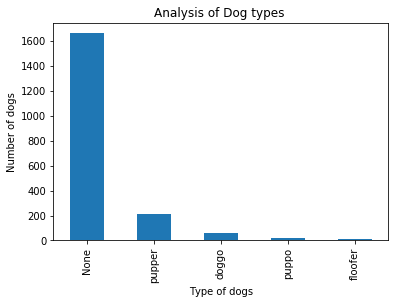

In [364]:
Q=T1234.type.value_counts()

X = Q[0]
Y = Q[1]
Z=Q[2]
W=Q[3]
E=Q[4]

print("There are "     +str(X)+ " dogs that is not determine which types .")
print('Number of Dogs that is pupper :'    +str(Y)+" dogs.")
print('Number of Dogs that is doggo : '    +str(Z)+" dogs.")
print('Number of Dogs that is puppo  :'    +str(W)+" dogs.")
print('Number of Dogs that is floofer :'   +str(E)+" dogs.")


Q.plot(kind="bar", title="Analysis of Dog types ");
plt.ylabel("Number of dogs");
plt.xlabel("Type of dogs");


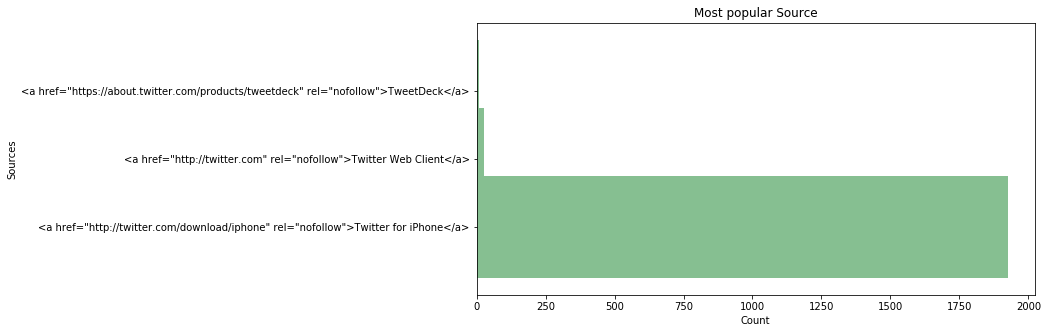

In [363]:
P= T1234['source'].value_counts()
P.plot(kind="barh", figsize=(10,5),color='#86bf91', zorder=1, width=1.5, title="Most popular Source");
plt.ylabel("Sources")
plt.xlabel("Count");

---

### <font color=Blue>Tweet Retweet Vs Favorites</font>

C:\Users\t33h3\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


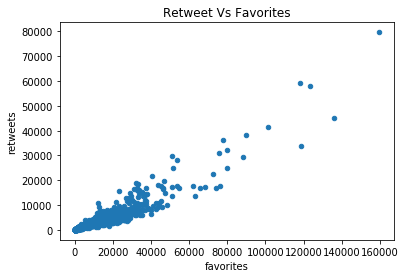

In [362]:
T1234.plot(kind='scatter',x='favorites',y='retweets', title="Retweet Vs Favorites");


The statistics shows that retweets is high correlated with favorites.

---

<a id='limitation'></a>

## <font color=blue|green>Limitations</font>



<font color=red|pink|yellow>I analyzed the dataset but some columns I couldn’t understand it very well because I didn’t collect the data by myself such as image predictition data , Also some skills I couldn’t be perfect with because I didn't use it before in analyzing data. Also Documentation was not clear for me because it is not famous in my country to adopt a dog , not many people in my country having a dog but I tried to understand as much as I can .


---

<a id='conclusions'></a>
## <font color=blue|green>Conclusions :</font>

<font color=blue|green|pink>The dataset that I was wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

The statistics shows that retweets is high correlated with favorites

If you are looking to adopt a dog , Most popular type is pupper. 


---